In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Cargar el dataset
# Asegúrate de que el archivo está en el mismo directorio o proporciona la ruta completa
df = pd.read_csv('democracy-eiu.csv')

# Ver las primeras filas del dataset
print(df.head())


statistic_column = 'democracy_eiu' 

country_selector1 = widgets.Dropdown(
    options=df['Entity'].unique(),
    description='País 1:',
)

country_selector2 = widgets.Dropdown(
    options=df['Entity'].unique(),
    description='País 2:',
)

def plot_data(country1, country2):
    filtered_df1 = df[df['Entity'] == country1]
    filtered_df2 = df[df['Entity'] == country2]
    
    plt.figure(figsize=(10, 6))
    
    if not filtered_df1.empty:
        plt.plot(filtered_df1['Year'], filtered_df1[statistic_column], marker='o', label=country1)
    else:
        print(f"No se encontraron datos para el país '{country1}'.")
        
    if not filtered_df2.empty:
        plt.plot(filtered_df2['Year'], filtered_df2[statistic_column], marker='x', label=country2)
    else:
        print(f"No se encontraron datos para el país '{country2}'.")
    
    plt.title(f'Evolución de {statistic_column} en {country1} y {country2} a lo largo del tiempo')
    plt.xlabel('Año')
    plt.ylabel(statistic_column)
    plt.legend()
    plt.grid(True)
    plt.show()

# Crear una interacción con el widget
widgets.interact(plot_data, country1=country_selector1, country2=country_selector2)




        Entity Code  Year  democracy_eiu
0  Afghanistan  AFG  2006           3.06
1  Afghanistan  AFG  2008           3.02
2  Afghanistan  AFG  2010           2.48
3  Afghanistan  AFG  2011           2.48
4  Afghanistan  AFG  2012           2.48


interactive(children=(Dropdown(description='País 1:', options=('Afghanistan', 'Africa', 'Albania', 'Algeria', …

<function __main__.plot_data(country1, country2)>

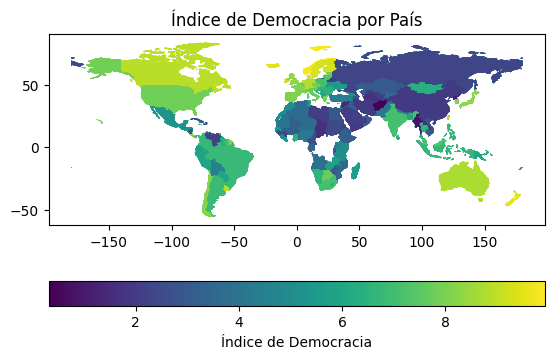

In [16]:
# Mapa del índice de democracia (suponiendo que el dataset tiene columnas 'country' y 'democracy_index')
import geopandas as gpd

# Cargar un shapefile del mundo
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Unir el shapefile con el dataframe del índice de democracia
world = world.merge(df, how='left', left_on='NAME', right_on='Entity')

# Crear el mapa
world.plot(column='democracy_eiu', legend=True,
           legend_kwds={'label': "Índice de Democracia",
                        'orientation': "horizontal"})
plt.title('Índice de Democracia por País')
plt.show()